<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/Clase_practica_An%C3%A1lisis_de_Datos_Video_Juegos_Soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<h1 style="text-align: center;font-size: 40px;">Análisis y visualización de ventas de videojuegos.</h1>

---
<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExejZwY3lqcGpleWh4ZnBtOTU4amQ5bTdnamZ3eGxpMDMwNmI4ZWp2ayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/H7AsEcCf7K0fCqlB77/giphy.gif"></center>

---

# **Introducción**

Eres un analista de datos en una compañía de inversión que busca invertir en el próximo gran éxito de la industria de los videojuegos. Para hacer una inversión inteligente, la compañía quiere comprender qué variables están más relacionadas con el éxito en ventas de videojuegos. Han logrado recopilar un conjunto de datos muy completo sobre el rendimiento de la industria de los videojuegos en los últimos 40 años ("vgsales.csv"), que incluye información sobre las ventas de juegos en diferentes regiones, plataformas, géneros y editoras.

Tu tarea es analizar este conjunto de datos y extraer información valiosa que pueda guiar las decisiones de inversión de la compañía. Para estructurar tu análisis, puedes seguir las preguntas orientadoras.



### Diccionario de variables

* Rank - Ranking de ventas totales
* Name - Nombre del juego
* Platform - Plataforma de lanzamiento del juego (por ejemplo, PC, PS4, etc.)
* Year - Año de lanzamiento del juego
* Genre - Género del juego
* Publisher - Editora del juego
* NA_Sales - Ventas en Norteamérica (en millones)
* EU_Sales - Ventas en Europa (en millones)
* JP_Sales - Ventas en Japón (en millones)
* Other_Sales - Ventas en el resto del mundo (en millones)
* Global_Sales - Ventas totales en todo el mundo (en millones)

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/Viny2030/HUMAI/refs/heads/main/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 1.1. Pre procesamiento

Realice un análisis descriptivo básico del dataset (dimensiones, tipo de datos, etc.) y un pre procesamiento (tratamiento de datos faltantes, duplicados, etc.)

- `head()`: Ver las primeras filas del conjunto de datos.
- `shape`: Obtener las dimensiones (filas, columnas) del conjunto de datos.
- `info()`: Resumen del conjunto de datos, incluyendo tipos de datos y valores no nulos.
- `describe()`: Estadísticas descriptivas de las columnas numéricas.
- `isnull().sum()`: Verificar valores faltantes en cada columna.
- `dropna()`: Eliminar filas o columnas con valores faltantes.
- `fillna()`: Rellenar valores faltantes con un valor específico o método (por ejemplo, media, mediana).
- `duplicated()`: Identificar filas duplicadas.

In [10]:
# Dimensiones
data.shape

(16598, 11)

In [11]:
# Tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
# Nulos
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [13]:
# Tratamiento de nulos
data.dropna(inplace=True)

In [14]:
# Duplicados
data.duplicated().sum()

0

In [15]:
data.describe().round(3)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000,16291.000,16291.000,16291.000,16291.000,16291.000,16291.000
mean,8290.190,2006.406,0.266,0.148,0.079,0.048,0.541
std,4792.654,5.832,0.822,0.509,0.312,0.190,1.567
min,1.000,1980.000,0.000,0.000,0.000,0.000,0.010
25%,4132.500,2003.000,0.000,0.000,0.000,0.000,0.060
50%,8292.000,2007.000,0.080,0.020,0.000,0.010,0.170
75%,12439.500,2010.000,0.240,0.110,0.040,0.040,0.480
max,16600.000,2020.000,41.490,29.020,10.220,10.570,82.740


## 1.2. Relación general entre las variables

### heatmap

<Axes: >

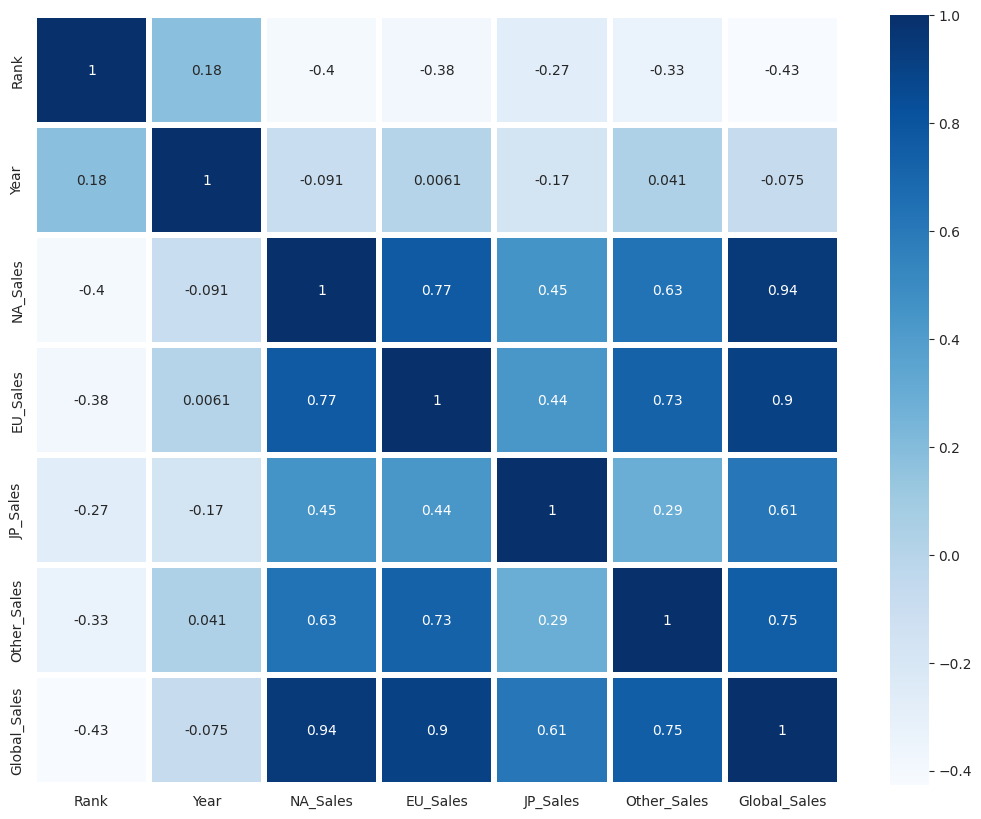

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(data.drop(columns=['Name', 'Platform', 'Genre', 'Publisher']).corr(), cmap = "Blues", annot=True, linewidth=3)

### Pair plot

In [17]:
# Acortamos el dataset para que tarde menos
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales", "EU_Sales", "Other_Sales"]]

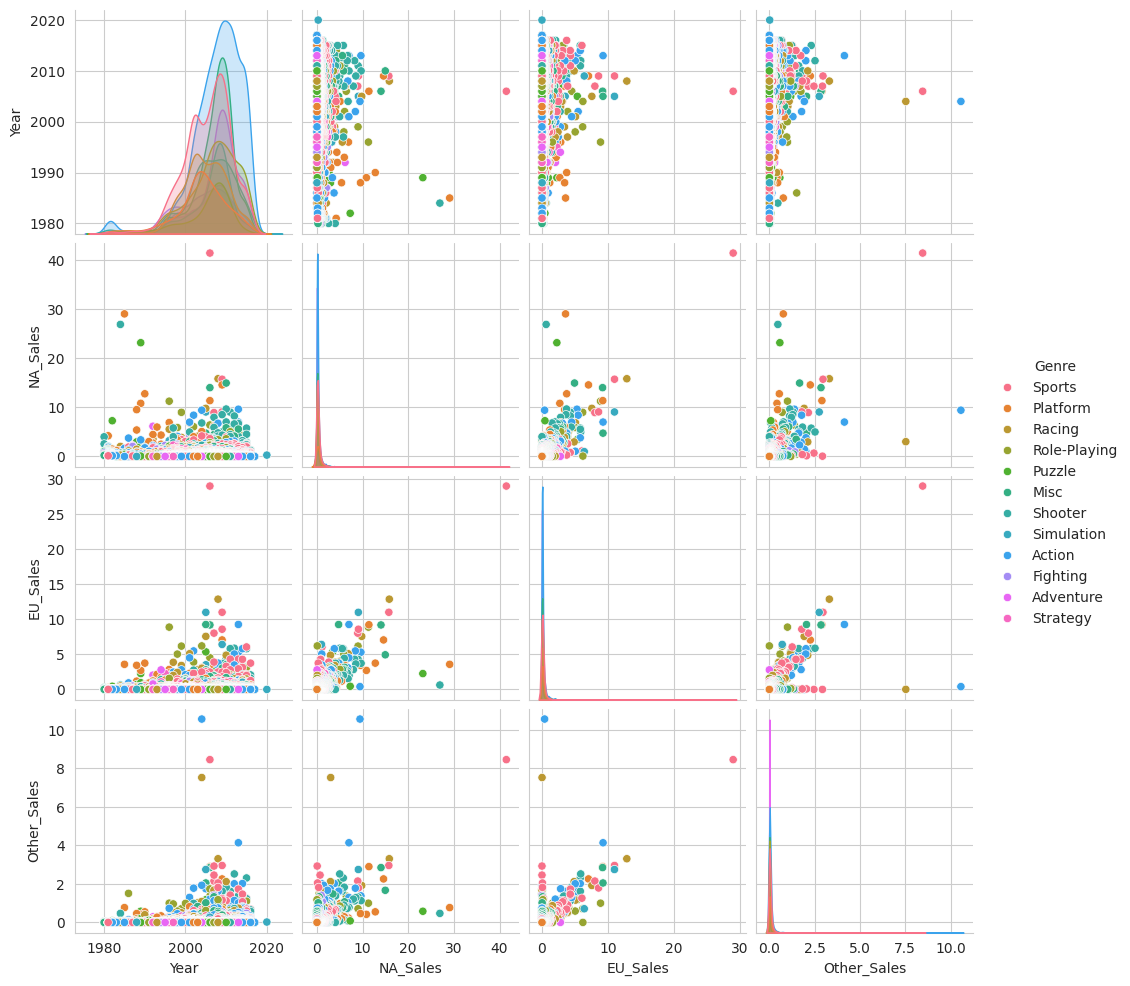

In [18]:
sns.pairplot(data_pair, hue='Genre')

### Log transform
Transformación para determinar mejor la relación entre variables

In [19]:
data_pair_log = data_pair.copy()

In [ ]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [ ]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

In [ ]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

# 2. ¿Qué género de juegos se ha producido más?

In [ ]:
data['Genre'].value_counts()

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
_ = plt.xticks(rotation=90)

# 2. ¿Qué año tuvo más lanzamientos de juegos?

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
_ = plt.xticks(rotation=90)

# 3. Los 5 años con más lanzamientos de juegos por género.




In [6]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
_ = plt.xticks(size=16, rotation=90)

NameError: name 'data' is not defined

<Figure size 3000x1000 with 0 Axes>

# 4. ¿Qué año tuvo las mayores ventas a nivel mundial?

In [ ]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
_ = plt.xticks(rotation=90)

# 5. ¿Qué género de juego ha sido lanzado más veces en un solo año?

In [ ]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [ ]:
genre = year_max_genre['Genre'].values

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

# 6. ¿Qué género de juego ha vendido más en un solo año?

In [ ]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [ ]:
genre = year_sale_max['Genre']

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 7. ¿Qué género de juego tiene el precio de venta más alto a nivel global?

In [ ]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
_ = plt.xticks(rotation=90)

# 8. ¿Qué plataforma tiene el precio de venta más alto a nivel global?

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
_ = plt.xticks(rotation=90)

# 9. ¿Qué juego individual tiene el precio de venta más alto a nivel global?

In [ ]:
top_game_sale = data.sort_values('Global_Sales', ascending=False).head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

# 10. Comparación de ventas por género y área.

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

# 11. Comparación de ventas por plataforma.

In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [ ]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 12. Top 20 principales editores.

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
_ =  plt.xticks(rotation=90)

# 13. Top ventas globales por editor

In [7]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

NameError: name 'data' is not defined

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
_ = plt.xticks(rotation=90)

# 14. Comparación de editores por área

In [ ]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

In [8]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

NameError: name 'comp_publisher' is not defined

In [ ]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# 15. Cantidad de editores por año

In [ ]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

In [ ]:
publisher= top_publisher_count['Publisher']

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 16. Ventas totales por region

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

### Pie chart de ventas por región

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# BONUS

Para quienes quieran seguir practicando la manipulación del dataset.

Muchas veces los datasets no tienen un formato apropiado (recordar concepto de Tidy Data). Cargar el dataset "vgsales2.csv" y modificarlo para que tenga el mismo formato que "vgsales.csv".

Pista: revisar las funciones "melt" y "pivot".

In [ ]:
data = pd.read_csv('vgsales2.csv')
data

In [ ]:
data = data.melt(id_vars=['Rank', 'Name', 'Platform', 'Genre', 'Publisher', 'Region', 'Sales'],
                              var_name='Year',
                              value_name='Global_Sales').sort_values(['Rank','Year'])

data = data.dropna(subset=['Global_Sales'])
data

In [ ]:
data = data.pivot(index=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'],
                              columns='Region',
                              values='Sales').reset_index()
data